# PREDICTIVE MODELING WITH MULTIPLE LR

In [1]:
import voila

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# here we are reading the file 
df= pd.read_csv(r"C:\Users\Ravinder singh\Downloads\CarPrice (1).csv")
df.head()
# this will display only the first five rows of dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


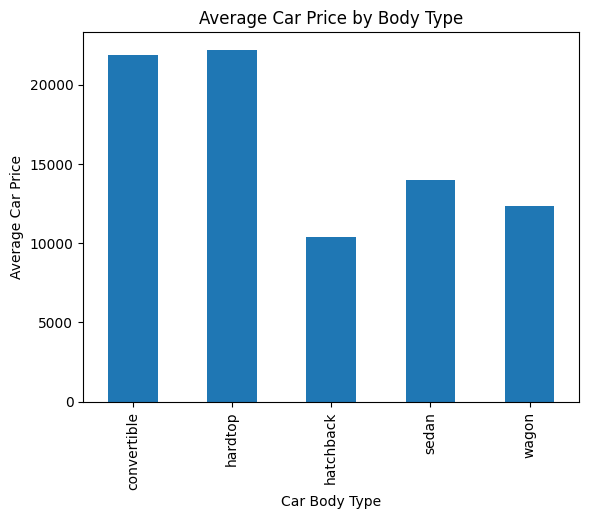

In [5]:
import matplotlib.pyplot as plt

# Grouping the data by car body and calculating the average price
average_prices = df.groupby('carbody')['price'].mean()

# Plotting the data
average_prices.plot(kind='bar')
plt.xlabel('Car Body Type')
plt.ylabel('Average Car Price')
plt.title('Average Car Price by Body Type')
plt.show()

In [6]:
import ipywidgets as widgets
from IPython.display import display


In [7]:
def plot_average_price(car_bodies):
    filtered_data = df[df['carbody'].isin(car_bodies)]
    average_prices = filtered_data.groupby('carbody')['price'].mean()
    
    plt.figure(figsize=(10, 6))
    average_prices.plot(kind='bar')
    plt.xlabel('Car Body Type')
    plt.ylabel('Average Car Price')
    plt.title('Average Car Price by Body Type')
    plt.show()


In [55]:
unique_body = df['carbody'].unique()

In [57]:
car_body_selector = widgets.SelectMultiple(options=unique_body,
                                           value=['sedan','wagon'],
                                           description='Car Body Types:')

In [58]:
interactive_plot = widgets.interactive(plot_average_price, car_bodies=car_body_selector)
display(interactive_plot)

interactive(children=(SelectMultiple(description='Car Body Types:', index=(2, 3), options=('convertible', 'hat…

In [12]:
# shape indicates the total no of rows and cols used is dataset
df.shape

(200, 26)

In [13]:

df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.880000,98.49800,173.680500,65.833500,53.680500,2542.995000,126.375000,3.323350,3.258200,10.098600,103.58000,5121.250000,25.325000,30.880000,13096.278335
std,57.879185,1.226016,5.86665,12.264967,2.118957,2.457574,520.781501,41.977194,0.266971,0.315891,3.913718,39.76885,480.693529,6.571552,6.917722,7997.436540
min,1.000000,-2.000000,86.60000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.00000,4150.000000,13.000000,16.000000,5118.000000
25%,50.750000,0.000000,94.50000,166.300000,64.000000,52.000000,2143.750000,97.000000,3.150000,3.110000,8.500000,70.00000,4800.000000,19.000000,25.000000,7775.000000
50%,100.500000,1.000000,96.75000,173.000000,65.450000,54.000000,2410.000000,110.500000,3.310000,3.290000,9.000000,95.00000,5150.000000,24.500000,30.000000,10096.500000
75%,150.250000,2.000000,101.20000,180.225000,66.500000,55.525000,2910.500000,141.000000,3.580000,3.410000,9.400000,116.00000,5500.000000,30.000000,36.000000,16106.000000
max,200.000000,3.000000,120.90000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.00000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
# to check is there any null  value present in dataset and 
# the  sum() function is used to calculate the total no of null value present in particular column
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [15]:
# it tells us the datatype of each columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            200 non-null    int64  
 1   symboling         200 non-null    int64  
 2   CarName           200 non-null    object 
 3   fueltype          200 non-null    object 
 4   aspiration        200 non-null    object 
 5   doornumber        200 non-null    object 
 6   carbody           200 non-null    object 
 7   drivewheel        200 non-null    object 
 8   enginelocation    200 non-null    object 
 9   wheelbase         200 non-null    float64
 10  carlength         200 non-null    float64
 11  carwidth          200 non-null    float64
 12  carheight         200 non-null    float64
 13  curbweight        200 non-null    int64  
 14  enginetype        200 non-null    object 
 15  cylindernumber    200 non-null    object 
 16  enginesize        200 non-null    int64  
 1

In [16]:
# dropping the values which are not neccessary 
df.drop(['car_ID','symboling','CarName'],axis=1,inplace=True)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
# after dropping 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          200 non-null    object 
 1   aspiration        200 non-null    object 
 2   doornumber        200 non-null    object 
 3   carbody           200 non-null    object 
 4   drivewheel        200 non-null    object 
 5   enginelocation    200 non-null    object 
 6   wheelbase         200 non-null    float64
 7   carlength         200 non-null    float64
 8   carwidth          200 non-null    float64
 9   carheight         200 non-null    float64
 10  curbweight        200 non-null    int64  
 11  enginetype        200 non-null    object 
 12  cylindernumber    200 non-null    object 
 13  enginesize        200 non-null    int64  
 14  fuelsystem        200 non-null    object 
 15  boreratio         200 non-null    float64
 16  stroke            200 non-null    float64
 1

In [18]:
# split the independent and dependent variables 
# here x is our independent features and y is our dependent features 
# using slicing we splitted the independent and dependent features
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [19]:
# find the correlation matrix
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
corr_matrix

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.871087,0.783349,0.583879,0.772938,0.571260,0.478156,0.184151,0.246360,0.345119,-0.391001,-0.463614,-0.536101,0.566367
carlength,0.871087,1.000000,0.834634,0.481068,0.875006,0.683334,0.604700,0.143524,0.151877,0.549897,-0.303890,-0.668837,-0.700277,0.675499
carwidth,0.783349,0.834634,1.000000,0.262022,0.864768,0.738804,0.554216,0.201228,0.174365,0.641901,-0.238202,-0.640906,-0.672776,0.754557
carheight,0.583879,0.481068,0.262022,1.000000,0.283246,0.058461,0.159041,-0.049402,0.261861,-0.120320,-0.330058,-0.037411,-0.095079,0.104717
curbweight,0.772938,0.875006,0.864768,0.283246,1.000000,0.852431,0.654496,0.178903,0.140903,0.752310,-0.276802,-0.757926,-0.795257,0.831950
enginesize,0.571260,0.683334,0.738804,0.058461,0.852431,1.000000,0.590865,0.212615,0.025712,0.811217,-0.252373,-0.651994,-0.674772,0.875631
boreratio,0.478156,0.604700,0.554216,0.159041,0.654496,0.590865,1.000000,-0.040524,0.032510,0.573549,-0.283842,-0.580009,-0.587804,0.556420
stroke,0.184151,0.143524,0.201228,-0.049402,0.178903,0.212615,-0.040524,1.000000,0.181495,0.089713,-0.059696,-0.053590,-0.053748,0.088528
compressionratio,0.246360,0.151877,0.174365,0.261861,0.140903,0.025712,0.032510,0.181495,1.000000,-0.208006,-0.435812,0.329822,0.279345,0.055860
horsepower,0.345119,0.549897,0.641901,-0.120320,0.752310,0.811217,0.573549,0.089713,-0.208006,1.000000,0.125686,-0.800671,-0.769872,0.811314


# heatmap of independent var and target variable

<Axes: >

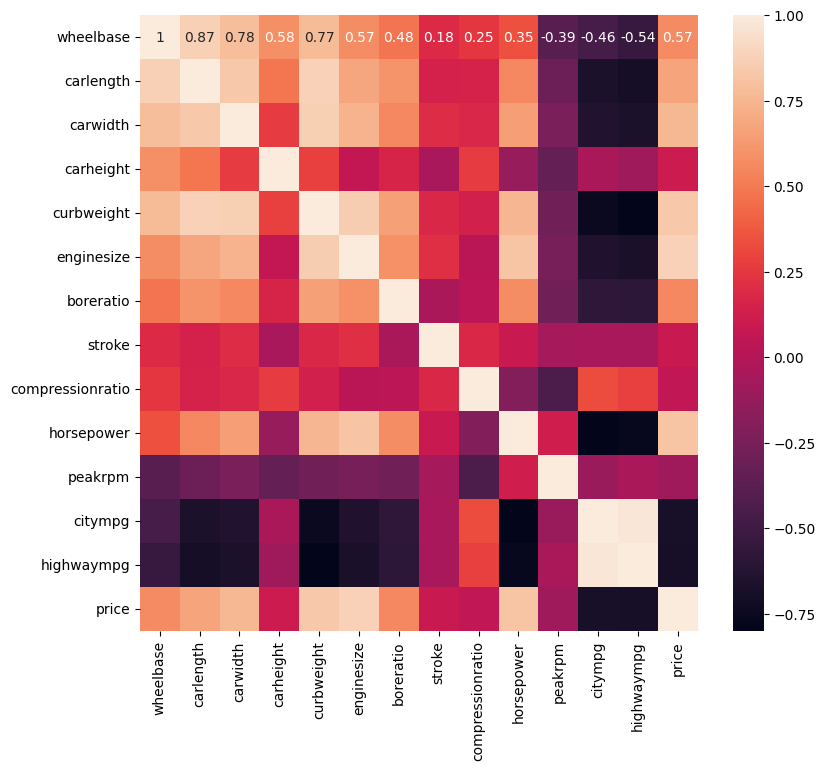

In [20]:
# both matplotlib and seaborn are used for visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 
# here we are setting the height and width of the the graph 
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix,annot=True)

<Axes: >

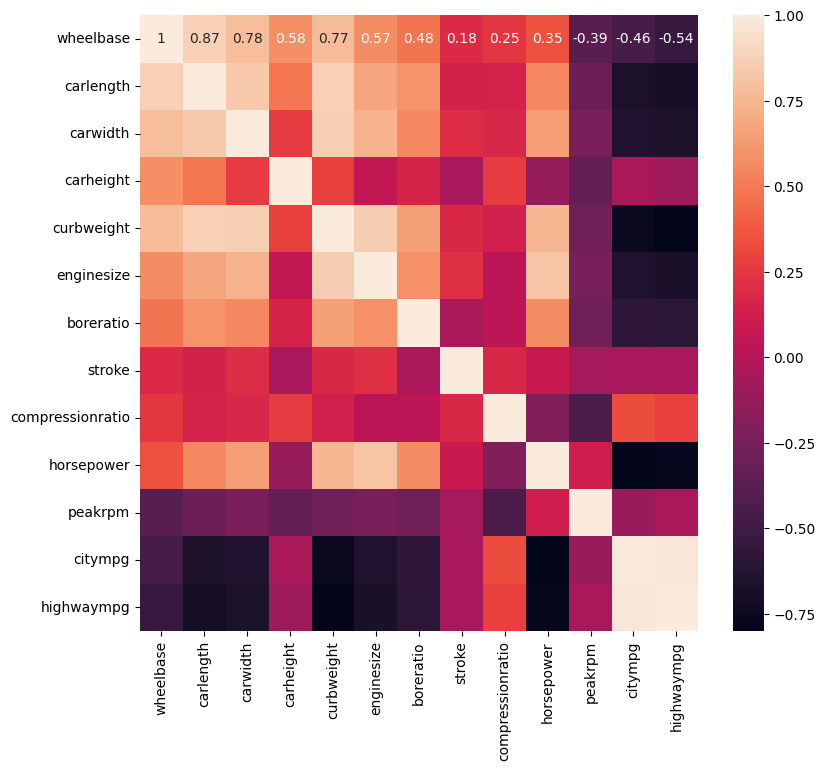

In [21]:
# displaying the correlation using heatmap 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,8))
x_df = x.select_dtypes(include=['number'])
cor=x_df.corr()   # finding the correlation of x dataset
sns.heatmap(cor,annot=True)
# in this we have elimanate the target col so that we can find the correLATION BETWEEN THE independent features 

In [22]:
# With the following function we can select highly correlated features 
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset,threshold):
    col_corr=set() # Set of all the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]  # getting the name of column
                col_corr.add(col_name)
                
    return col_corr

In [23]:
# here we call the function and pass the dataset and threshold value 
# len function calculates the total number of correlation features
correlation_features=correlation(x_df,0.8)
len(set(correlation_features))

6

In [24]:
correlation_features

{'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower'}

In [25]:
# here we droping the correlation feature 
x.drop(correlation_features,axis=1,inplace=True)

In [26]:
# After dropping the values 
x

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg
0,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,four,mpfi,3.47,2.680,9.00,5000,21
1,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,four,mpfi,3.47,2.680,9.00,5000,21
2,gas,std,two,hatchback,rwd,front,94.5,52.4,ohcv,six,mpfi,2.68,3.470,9.00,5000,19
3,gas,std,four,sedan,fwd,front,99.8,54.3,ohc,four,mpfi,3.19,3.400,10.00,5500,24
4,gas,std,four,sedan,4wd,front,99.4,54.3,ohc,five,mpfi,3.19,3.400,8.00,5500,18
5,gas,std,two,sedan,fwd,front,99.8,53.1,ohc,five,mpfi,3.19,3.400,8.50,5500,19
6,gas,std,four,sedan,fwd,front,105.8,55.7,ohc,five,mpfi,3.19,3.400,8.50,5500,19
7,gas,std,four,wagon,fwd,front,105.8,55.7,ohc,five,mpfi,3.19,3.400,8.50,5500,19
8,gas,turbo,four,sedan,fwd,front,105.8,55.9,ohc,five,mpfi,3.13,3.400,8.30,5500,17
9,gas,turbo,two,hatchback,4wd,front,99.5,52.0,ohc,five,mpfi,3.13,3.400,7.00,5500,16


In [27]:
x.shape

(200, 16)

In [28]:
for each_col in x:
    #print('\n')
    print(x[each_col].unique(), each_col)

['gas' 'diesel'] fueltype
['std' 'turbo'] aspiration
['two' 'four'] doornumber
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] carbody
['rwd' 'fwd' '4wd'] drivewheel
['front' 'rear'] enginelocation
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3] wheelbase
[48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.8 50.6 59.8 50.2
 52.6 54.5 58.3 53.3 54.1 51.  53.5 51.4 52.8 47.8 49.6 55.5 54.4 56.5
 58.7 54.9 56.7 55.4 54.8 49.4 51.6 54.7 55.1 56.1 49.7 56.  50.5 55.2
 52.5 53.  59.1 53.9 55.6 56.2 57.5] carheight
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] enginetype
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] cylindernumber
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] fuelsystem
[3.47 2.68 3.

In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          200 non-null    object 
 1   aspiration        200 non-null    object 
 2   doornumber        200 non-null    object 
 3   carbody           200 non-null    object 
 4   drivewheel        200 non-null    object 
 5   enginelocation    200 non-null    object 
 6   wheelbase         200 non-null    float64
 7   carheight         200 non-null    float64
 8   enginetype        200 non-null    object 
 9   cylindernumber    200 non-null    object 
 10  fuelsystem        200 non-null    object 
 11  boreratio         200 non-null    float64
 12  stroke            200 non-null    float64
 13  compressionratio  200 non-null    float64
 14  peakrpm           200 non-null    int64  
 15  citympg           200 non-null    int64  
dtypes: float64(5), int64(2), object(9)
memory us

In [30]:
# Here we done encoding for  categorical features using get dummies method 
encode = pd.get_dummies(x, columns = ['fueltype','aspiration','doornumber','carbody','drivewheel',
                                      'enginelocation','enginetype','cylindernumber','fuelsystem'],drop_first=True)

In [31]:
# new dataframe after encoding 
encode

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,48.8,3.47,2.680,9.00,5000,21,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,88.6,48.8,3.47,2.680,9.00,5000,21,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,94.5,52.4,2.68,3.470,9.00,5000,19,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,99.8,54.3,3.19,3.400,10.00,5500,24,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,99.4,54.3,3.19,3.400,8.00,5500,18,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
5,99.8,53.1,3.19,3.400,8.50,5500,19,True,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
6,105.8,55.7,3.19,3.400,8.50,5500,19,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
7,105.8,55.7,3.19,3.400,8.50,5500,19,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
8,105.8,55.9,3.13,3.400,8.30,5500,17,True,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
9,99.5,52.0,3.13,3.400,7.00,5500,16,True,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [32]:
# here we done scaling on each features to get the values in same range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
encode.iloc[:,:] = sc.fit_transform(encode.iloc[:,:])
encode

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.691398,-1.990885,0.550689,-1.834971,-0.281409,-0.252873,-0.659791,0.323994,-0.452570,1.105542,-0.204124,-0.733799,-0.913708,-0.377964,-1.224745,1.347925,-0.123404,-0.070888,-0.252646,-1.603567,-0.284747,-0.252646,-0.142857,-0.241249,0.531085,-0.351562,-0.070888,-0.070888,-0.142857,-0.701810,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
1,-1.691398,-1.990885,0.550689,-1.834971,-0.281409,-0.252873,-0.659791,0.323994,-0.452570,1.105542,-0.204124,-0.733799,-0.913708,-0.377964,-1.224745,1.347925,-0.123404,-0.070888,-0.252646,-1.603567,-0.284747,-0.252646,-0.142857,-0.241249,0.531085,-0.351562,-0.070888,-0.070888,-0.142857,-0.701810,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
2,-0.683189,-0.522350,-2.415857,0.672167,-0.281409,-0.252873,-0.964897,0.323994,-0.452570,1.105542,-0.204124,1.362770,-0.913708,-0.377964,-1.224745,1.347925,-0.123404,-0.070888,-0.252646,-1.603567,-0.284747,3.958114,-0.142857,-0.241249,-1.882938,2.844452,-0.070888,-0.070888,-0.142857,-0.701810,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
3,0.222489,0.252710,-0.500745,0.450015,-0.025257,0.789901,-0.202133,0.323994,-0.452570,-0.904534,-0.204124,-0.733799,1.094442,-0.377964,0.816497,-0.741881,-0.123404,-0.070888,-0.252646,0.623610,-0.284747,-0.252646,-0.142857,-0.241249,0.531085,-0.351562,-0.070888,-0.070888,-0.142857,-0.701810,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
4,0.154136,0.252710,-0.500745,0.450015,-0.537562,0.789901,-1.117450,0.323994,-0.452570,-0.904534,-0.204124,-0.733799,1.094442,-0.377964,-1.224745,-0.741881,-0.123404,-0.070888,-0.252646,0.623610,-0.284747,-0.252646,-0.142857,4.145096,-1.882938,-0.351562,-0.070888,-0.070888,-0.142857,-0.701810,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
5,0.222489,-0.236801,-0.500745,0.450015,-0.409486,0.789901,-0.964897,0.323994,-0.452570,1.105542,-0.204124,-0.733799,1.094442,-0.377964,0.816497,-0.741881,-0.123404,-0.070888,-0.252646,0.623610,-0.284747,-0.252646,-0.142857,4.145096,-1.882938,-0.351562,-0.070888,-0.070888,-0.142857,-0.701810,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
6,1.247786,0.823808,-0.500745,0.450015,-0.409486,0.789901,-0.964897,0.323994,-0.452570,-0.904534,-0.204124,-0.733799,1.094442,-0.377964,0.816497,-0.741881,-0.123404,-0.070888,-0.252646,0.623610,-0.284747,-0.252646,-0.142857,4.145096,-1.882938,-0.351562,-0.070888,-0.070888,-0.142857,-0.701810,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
7,1.247786,0.823808,-0.500745,0.450015,-0.409486,0.789901,-0.964897,0.323994,-0.452570,-0.904534,-0.204124,-0.733799,-0.913708,2.645751,0.816497,-0.741881,-0.123404,-0.070888,-0.252646,0.623610,-0.284747,-0.252646,-0.142857,4.145096,-1.882938,-0.351562,-0.070888,-0.070888,-0.142857,-0.701810,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
8,1.247786,0.905393,-0.726053,0.450015,-0.460716,0.789901,-1.270003,0.323994,2.209605,-0.904534,-0.204124,-0.733799,1.094442,-0.377964,0.816497,-0.741881,-0.123404,-0.070888,-0.252646,0.623610,-0.284747,-0.252646,-0.142857,4.145096,-1.882938,-0.351562,-0.070888,-0.070888,-0.142857,-0.701810,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
9,0.171225,-0.685520,-0.726053,0.450015,-0.793715,0.789901,-1.422556,0.323994,2.209605,1.105542,-0.204124,1.362770,-0.913708,-0.377964,-1.224745,-0.741881,-0.123404,-0.070888,-0.252646,0.623610,-0.284747,-0.252646,-0.142857,4.145096,-1.882938,-0.351562,-0.070888,-0.070

#after applying the encoding 
x

In [33]:
# converting the values of y in numpy array 
y=y.values

In [34]:
# here encode contains indepedent features and
# y contains dependent column
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(encode,y,test_size=0.2,random_state=15)
# here 0.2 means , 80 percent of data is used for training and remaining 20 percent of data used for testing 

In [35]:
# LINEAR REGRESSION 
from sklearn.linear_model import LinearRegression
r1=LinearRegression()
r1.fit(x_train,y_train) # here we train our model using traning dataset 

LinearRegression()

In [36]:
y_pred=r1.predict(x_test) # using our regression model we predict the predicted values using testing dataset 
y_pred

array([35932.74585983, 18009.76978906, 23930.99038267, 16853.94227635,
       32369.90950908,  9639.52450287, -2393.64319122, 12320.37118158,
        7144.77192273, 11395.        , 10444.44982657, 39616.30516888,
        5862.07906196,  7376.93528182, 22365.72659397,  6872.11824456,
       22894.88334511, 10855.31394635,  7622.9417597 , 20681.82134218,
       17245.09575281,  5954.40727805, 10855.31394635, 16197.92366779,
        8916.27180196,  8433.31798315,  8537.38151156, 19766.21138858,
        6217.48405658,  5326.06990771,  6891.04301145,  7645.22288173,
       12146.4242624 , 40601.12582579,  6367.58450172,  7129.59364472,
       11108.53383299, 14831.39319936,  5920.88485421, 16795.24658166])

In [37]:
y_test

array([36000.   , 13295.   , 20970.   , 17669.   , 34028.   , 10295.   ,
        6479.   , 11199.   ,  5118.   , 13645.   , 13845.   , 35056.   ,
        5348.   ,  7463.   , 15645.   ,  7609.   , 17859.167, 16630.   ,
        7995.   , 18420.   , 18150.   ,  7295.   , 11900.   , 16695.   ,
        9298.   ,  8358.   , 10198.   , 18280.   ,  6229.   ,  5572.   ,
        6649.   ,  9995.   , 18150.   , 34184.   ,  7053.   , 16500.   ,
        8189.   , 17950.   ,  7349.   , 18399.   ])

In [38]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score
# here r2_score tells us the performance of our model  

0.8285650454048933

In [39]:
from sklearn import metrics
#MAE
print("MAE=",metrics.mean_absolute_error(y_test,y_pred))
#MSE
print("MSE=",metrics.mean_squared_error(y_test,y_pred))
#RMSE
print("RMSE=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE= 2409.806199139418
MSE= 11734229.77675744
RMSE= 3425.52620436006


In [40]:
# pickle module
import dill
file="ML1" # creating a file ML1 
fileobj=open(file,'wb') # here we open the file write mode 
dill.dump(r1,fileobj) # Now here we dump our linear regression model (r1) into file (ML1)
fileobj.close()

# prediction on new dataset 

# Predicting the price of car using previously trained model 

In [41]:
# this is a new dataset on which we check our previous trained model (r1)
df1=pd.read_excel(r'C:\Users\Ravinder singh\Downloads\CarPrice1.xlsx')
df2=df1.copy()
df1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
1,2,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,53.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
2,3,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
3,4,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27
4,5,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25


In [42]:
# droping unnecessary features 
df1.drop(['car_ID','symboling','CarName'],axis=1,inplace=True)
df1

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,53.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
2,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
3,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27
4,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25


In [43]:
# here we drop the correlated featues 
df1.drop(correlation_features,axis=1,inplace=True)
df1

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg
0,gas,std,four,sedan,rwd,front,109.1,55.5,ohc,four,mpfi,3.78,3.15,9.5,5400,23
1,gas,turbo,four,sedan,rwd,front,109.1,53.5,ohc,four,mpfi,3.78,3.15,8.7,5300,19
2,gas,std,four,sedan,rwd,front,109.1,55.5,ohcv,six,mpfi,3.58,2.87,8.8,5500,18
3,diesel,turbo,four,sedan,rwd,front,109.1,55.5,ohc,six,idi,3.01,3.40,23.0,4800,26
4,gas,turbo,four,sedan,rwd,front,109.1,55.5,ohc,four,mpfi,3.78,3.15,9.5,5400,19


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          5 non-null      object 
 1   aspiration        5 non-null      object 
 2   doornumber        5 non-null      object 
 3   carbody           5 non-null      object 
 4   drivewheel        5 non-null      object 
 5   enginelocation    5 non-null      object 
 6   wheelbase         5 non-null      float64
 7   carheight         5 non-null      float64
 8   enginetype        5 non-null      object 
 9   cylindernumber    5 non-null      object 
 10  fuelsystem        5 non-null      object 
 11  boreratio         5 non-null      float64
 12  stroke            5 non-null      float64
 13  compressionratio  5 non-null      float64
 14  peakrpm           5 non-null      int64  
 15  citympg           5 non-null      int64  
dtypes: float64(5), int64(2), object(9)
memory usage:

In [45]:
df1.shape

(5, 16)

In [46]:
# Encoding 
# The label parameter = encode.columns, which is a list of column names from historic  DataFrame called encode. 
# This means that the columns of the new DataFrame(df_newdata) will be in the same order as the columns of the encode DataFrame.
df_newdata = df1.reindex(labels=encode.columns,axis=1)
df_newdata

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,109.1,55.5,3.78,3.15,9.5,5400,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109.1,53.5,3.78,3.15,8.7,5300,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109.1,55.5,3.58,2.87,8.8,5500,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109.1,55.5,3.01,3.40,23.0,4800,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109.1,55.5,3.78,3.15,9.5,5400,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_newdata.shape

(5, 36)

In [48]:
# Now to replace null values with 0 
df_newdata.fillna(0,inplace=True)
df_newdata

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,109.1,55.5,3.78,3.15,9.5,5400,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,109.1,53.5,3.78,3.15,8.7,5300,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,109.1,55.5,3.58,2.87,8.8,5500,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109.1,55.5,3.01,3.40,23.0,4800,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109.1,55.5,3.78,3.15,9.5,5400,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# After encoding , we done scaling on each features to get the values in same range 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_newdata.iloc[:,:] = sc.fit_transform(df_newdata.iloc[:,:])
df_newdata

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.0,0.5,0.650494,0.035765,-0.431638,0.483494,0.659380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-2.0,0.650494,0.035765,-0.575517,0.080582,-0.659380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.5,-0.020118,-1.633269,-0.557532,0.886405,-0.989071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,-1.931364,1.525974,1.996325,-1.933975,1.648451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.5,0.650494,0.035765,-0.431638,0.483494,-0.659380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# NOTE :- Your new data should have the same exact columns as the data that you used to train and persist your original model. 

# Actual price of car
16845
19045
21485
22470
22625


In [50]:
# here using pickle module or using historic  linear reg model, we predict the price the of the car . 
load_file=dill.load(open('ML1','rb'))
print("Price predicted by our model :-->",load_file.predict(df_newdata))
# predicted price of a car by previously trained model

Price predicted by our model :--> [16302.85703555 20102.72642052 20138.28078723 -9361.93821355
 17942.49863761]


In [51]:
# adding predicted price as a col with df2 (orignal dataframe )
df2['Price pred by model'] = load_file.predict(df_newdata)
df2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Price pred by model
0,1,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16302.857036
1,2,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,53.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,20102.726421
2,3,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,20138.280787
3,4,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,-9361.938214
4,5,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,17942.498638


In [52]:
#pip list


In [53]:
#pip freeze

In [60]:
!pip freeze > requirements.txt